# general imports

In [3]:
import numpy as np
import cv2
import pickle
import os
import matplotlib.pyplot as plt
from pykinect2 import PyKinectV2
from pykinect2 import PyKinectRuntime
import ipywidgets as wdg
import kinectmapper

# opening camera 1 files

In [36]:
col1 = open(r"boxData\colorB_3a.pickle", "rb")
colorFrame1 = pickle.load(col1)
col1.close()

dep1 = open(r"boxData\depthB_3a.pickle", "rb")
depthFrame1 = pickle.load(dep1)
dep1.close()
print("finished reading")

finished reading


# getting XY of the image- camera 1

<IPython.core.display.Javascript object>


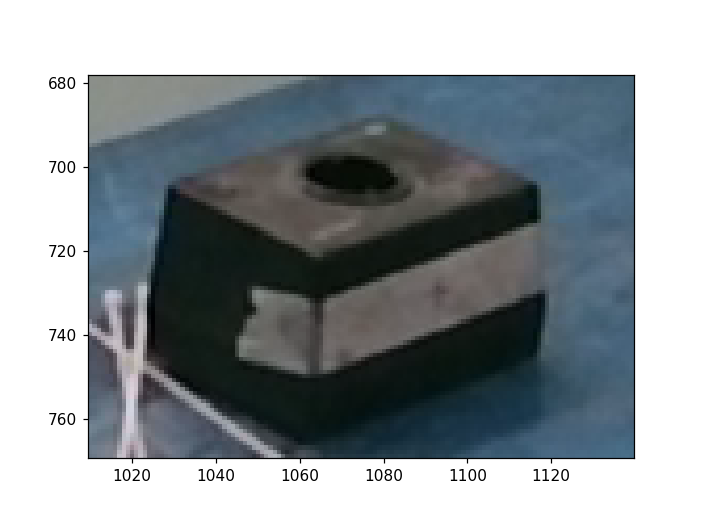

Textarea(value='', description='event:', placeholder='')

In [23]:
%matplotlib notebook

fig = plt.figure()
plt.imshow(colorFrame1)

txt = wdg.Textarea(
    value='',
    placeholder='',
    description='event:',
    disabled=False
)
display(txt)

global points_clicked
points_clicked = []

# Define a callback function that will update the textarea
def onclick(event):
    txt.value = str(event)  # Dynamically update the text box above
    xy = [int(event.xdata), int(event.ydata)]
    points_clicked.append(xy)

# Create an hard reference to the callback not to be cleared by the garbage collector
ka = fig.canvas.mpl_connect('button_press_event', onclick)


In [24]:
pos1 = points_clicked
print(pos1)

[[1011, 675], [1093, 730]]


In [37]:
#kinect depth points

oval1 = kinectmapper.PyKinectMapper().get_camspace_position(depthFrame1, pos1[1])
# zval1 = kinectmapper.PyKinectMapper().get_camspace_position(depthFrame1, pos1[2])
# xval1 = kinectmapper.PyKinectMapper().get_camspace_position(depthFrame1, pos1[3])
# 
# print(f"orgin value {oval1} \nz value {zval1} \nx value {xval1}")
# print(f"{oval1[0]},{oval1[1]},{oval1[2]}\n{zval1[0]},{zval1[1]},{zval1[2]}\n{xval1[0]},{xval1[1]},{xval1[2]}")
print(f"{oval1[0]},{oval1[1]},{oval1[2]}")

0.1362544298171997,-0.2553251087665558,1.4820001125335693


# loading camera 1 files after exposure

In [27]:
col1 = open(r"newData\colorA_1a.pickle", "rb")
colorFrame1a = pickle.load(col1)
col1.close()

dep1 = open(r"newData\depthA_1a.pickle", "rb")
depthFrame1a = pickle.load(dep1)
dep1.close()
print("finished reading")

finished reading


In [31]:
oval1a = kinectmapper.PyKinectMapper().get_camspace_position(depthFrame1a, pos1[1])
zval1a = kinectmapper.PyKinectMapper().get_camspace_position(depthFrame1a, pos1[2])
xval1a = kinectmapper.PyKinectMapper().get_camspace_position(depthFrame1a, pos1[3])

print(f"orgin value {oval1a} \nz value {zval1a} \nx value {xval1a}")
print(f"{oval1a[0]},{oval1a[1]},{oval1a[2]}\n{zval1a[0]},{zval1a[1]},{zval1a[2]}\n{xval1a[0]},{xval1a[1]},{xval1a[2]}")

orgin value [-0.06976061314344406, -0.3179325759410858, 1.4730000495910645] 
z value [-0.07372015714645386, -0.3516571521759033, 1.3290001153945923] 
x value [0.12758034467697144, -0.3226979970932007, 1.477000117301941]
-0.06976061314344406,-0.3179325759410858,1.4730000495910645
-0.07372015714645386,-0.3516571521759033,1.3290001153945923
0.12758034467697144,-0.3226979970932007,1.477000117301941


In [26]:
#differece between both values
o1a_diff = np.array(oval1) - np.array(oval1a)
z1a_diff = np.array(zval1) - np.array(zval1a)
x1a_diff = np.array(xval1) - np.array(xval1a)
print(z1a_diff*1000)

[ 0.44375658  2.11679935 -7.999897  ]
